Chezka Sino (9028-67538)

# MCIS6273 Data Mining (Prof. Maull) / Fall 2019 / HW1

**This assignment is worth up to 25 POINTS to your grade total if you complete it on time.**

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 25 | Wednesday, Nov 26 @ Midnight | _up to_ 6 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* improve on your homework 0 assignment, if necessary

* work with core Python libraries to do data munging to build a dataset

* extend your exploration to a larger dataset

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw1`.   Put all of your files in that directory.  Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw1_files.zip`), then
download it to your local machine, then upload the `.zip` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using zip in Linux.

If you choose not to use the provided notebook, you will still need to turn in a
`.ipynb` Jupyter Notebook and corresponding files according to the instructions in
this homework.

## ASSIGNMENT TASKS
### (50%) work with core Python libraries to do data munging to build a dataset 

In the last homework, you learned how powerful Pandas is for data engineering, analysis and exploratory
data analysis activities.  We will use it more in this part of the homework to create a  dataset for further analysis.

Power weightlifting (powerlifting) is an international sport that invites advanced ameteurs and professionals alike.  Fortunately,
there are datasets for the multitude of powerlifting competitions around the world, and they are openly available
for curious data scientists like ourselves who would like to ask interesting questions and find interesting
relationships in the data.  Whether you're into the sport or not, I think there are a variety of
interesting phenomenon in the data that make it both tractable and interesting from just a data perspective.

**DATA**

[OpenPowerLifting.org](https://OpenPowerLifting.org) is a large set of data for a multitude of data related to powerlifting
competitions around the world.  The core data live at the following open source repository on [gitlab.com/openpowelifting](https://gitlab.com/openpowerlifting/opl-data).

For the curious, there are a number of analyses that have already been performed on the data in a number of
interesting ways.  Please visit [this page](https://www.openpowerlifting.org/data) to further fill
your intrigue.

Though the full dataset is available to us and will be used in the next part of the assignment, we want
to get a little practice getting data from websites that require some HTML parsing and navigation.  Unlike
the last time where we used APIs to get data, we're going to build a dataset _en masse_ from the CSV data
on Gitlab.  Remarkably, while this technique may seem antiquated, you will find many datasets are just
sitting on servers as text files that will require something similar to be accomplished.  We're unfortunately
not yet in a data environment where the most interesting data you want is easily obtained or accessible behind
APIs.  Often the resources to do so are beyond the capabilities of the data providers, though things are
getting better each year with new tools and data access platforms.

We're going to use Python and the [Beautiful Soup library](https://www.crummy.com/software/BeautifulSoup/)
to build a random dataset of just 2019 data by directly navigating the
HTML of the Gitlab repository.  It will be noted that [Gitlab does have an API](https://docs.gitlab.com/ee/api/),
and it would be the preferred mechanism if we were to do this exercise with APIs like the last assignment.

&#167;  **BUILD THE DATASET**

We've learned CSV is common file format for data and we will be working the files large text files in
Gitlab to do the work we need.  The task is to explore the repository and build up a dataset of 15
random lifting meets from 2019 using
[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and the tools in Pandas to
put these datasets together.

This technique is often known as "crawling" and is consider by some to
be a flagrant violation of good web etiquette. However, the technique is
still often the only way to obtain data _en masse_ from a single source.
If this were an FTP server, the same pattern could be applied and would
_not_ be considered unusual to do so. Of course, you must use this with
caution, as it can result in IP throttling and IP blocking, so please
use it within the licensing terms of both the data and website you are
obtaining data from. Good web citizens restore trust in providers and
administrators alike, so throttling yourself after your own requests
with code like `time.sleep(2)` (which will pause your code for 2
seconds), will show that you can behave responsibly.

Once you have loaded all the files, please re-index the rows using the
[`Dataframe.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)
method.

Study the [supplemental Notebook](https://nbviewer.jupyter.org/github/kmsaumcis/mcis6273_f19_datamining/blob/master/homework/hw1/hw1_supplemental.ipynb)
to understand a few ways you may complete your work.




In [1]:
import requests
page = requests.get("https://gitlab.com/openpowerlifting/opl-data/tree/master/meet-data/").content

In [2]:
from bs4 import BeautifulSoup

In [3]:
doc = BeautifulSoup(page)
lst_fed = [ i['title'] for i in doc.find_all(class_='str-truncated') if '/' not in i['title']]

In [4]:
import random

In [16]:
random.shuffle(lst_fed) # this randomizes the list in place
lst_fed[:15]

['nzpf',
 'ukrainepo',
 'pride',
 'udfpf',
 'england-ua',
 'oevk',
 'achipo',
 'irishpf',
 'nz-ua',
 'bpf',
 'rawironpl',
 'irp',
 'usa-ua',
 'wpc-italy',
 'bp']

In [17]:
import pandas as pd
import time

In [18]:
template = "https://gitlab.com/openpowerlifting/opl-data/raw/master/meet-data/{}/{}/entries.csv"
df = pd.DataFrame()

for f in lst_fed[:15]:

    try:
        page = requests.get("https://gitlab.com/openpowerlifting/opl-data/tree/master/meet-data/{}".format(f)).content
        doc = BeautifulSoup(page)
        lst_2019 = [i['title'] for i in doc.find_all(class_='str-truncated') if i['title'][:2] == '19']

        for y in lst_2019:
            sample = template.format(f, y)
            df = pd.concat([df, pd.read_csv(sample)], sort=False)

        print("{} ...".format(f))
        time.sleep(1.5)
    except Exception as e:
        print("X {} ...".format(f))

nzpf ...
ukrainepo ...
pride ...
udfpf ...
england-ua ...
oevk ...
achipo ...
irishpf ...
nz-ua ...
bpf ...
rawironpl ...
irp ...
usa-ua ...
wpc-italy ...
bp ...


In [19]:
df.reset_index()
df.head()

,Name,Team,Sex,Division,Event,Equipment,BodyweightKg,WeightClassKg,Age,Squat1Kg,...,Best3DeadliftKg,TotalKg,Place,BirthYear,BirthDate,Squat4Kg,Bench4Kg,Deadlift4Kg,Country,State
0,Margaret Bastion,WB,F,Masters 3,SBD,Raw,70.40,72,65.0,82.5,...,125.0,260.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sue Taylor,RNP,F,Masters 2,SBD,Raw,93.80,84+,55.0,90.0,...,95.0,240.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jennie Hopkinson,WB,F,Masters 1,SBD,Raw,70.00,72,45.0,115.0,...,160.0,352.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yena Wei,TPG,F,Open,SBD,Raw,60.00,63,35.0,80.0,...,92.5,222.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Emma Waters,TPG,F,Open,SBD,Raw,70.15,72,38.0,77.5,...,112.5,255.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


&#167;  **GET BASIC DESCRIPTIVE DATA ABOUT THE 2019 RANDOM DATASET**

Load the dataset from the previous part into a DataFrame and **answer the following questions**:

* What is _mean_ age of all athletes in your data?


In [20]:
df['Age'].mean()

29.766749379652605

* What is the _median_ age of all athletes?

In [21]:
df['Age'].median()

28.0

* What percentage of your data are Women (i.e. `Sex=="F"`)?

In [22]:
len(df.query('Sex == "F"'))/len(df)

0.36099585062240663

* What is the _mean_ `Best3BenchKg` for MEN weighing more than 100Kg (i.e. `BodyweightKg>100`)?

In [23]:
df.query('BodyweightKg>100').loc[:,'Best3BenchKg'].mean()

144.3024296675192

* Compare the _median_ `Best3SquatKg` for WOMEN over 40?  And WOMAN under 40?  What difference do you observe?

In [24]:
over_40 = df.query('Sex == "F" & Age > 40').loc[:,'Best3SquatKg'].median()
under_40 = df.query('Sex == "F" & Age < 40').loc[:,'Best3SquatKg'].median()

In [25]:
over_40 - under_40

-21.25

Women under 40 has 21.25 greater Best3SquatKg median than women over 40.

To answer the preceding questions, you will need to explore [selection and filtering](http://pandas.pydata.org/pandas-docs/stable/indexing.html)
of DataFrames, with close attention on [`.loc[]`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html#pandas.DataFrame.loc),
[`.iloc[]`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc) and [`.query()  `](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html#pandas.DataFrame.query).  `.query()` will be especially useful.

You may also want to carefully explore [`.describe()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe),
as doing so might reduce your effort considerably.  Your Jupyter Notebook will need to provide **correct and executable cells** for the answers or you will not received
full credit!

&#167;  **PLOT THE RELATIONSHIP BETWEEN `Age` AND `TotalKg` USING SEABORN**

[Seaborn](http://seaborn.pydata.org/index.html) is a visualization library for Python
that "provides a high-level interface for drawing attractive and informative statistical graphics."  It
extends many of the capabilities of matplotlib and has a high degree of polish compared to the
standard plots produced by matplotlib.

Use Seaborn to plot the relationship between `Age` and `TotalKg` by restricting your
dataset to just `Age` and `TotalKg`.  You may use the code from the supplemental notebook to
get clues on how to do this.  Furthermore, this plot should have the `Age` as the $x$-axis and
`TotalKg` on the $y$-axis. To complete this part, you will need to review the
[`seaborn.jointplot()`](http://seaborn.pydata.org/generated/seaborn.jointplot.html) method.

* Please write a rationale _using the plot in your analysis_ for the support (or lack of support) for
the claim that _the older an athlete gets the less total weight they will be able to lift_.


In [26]:
%matplotlib inline
import seaborn as sns

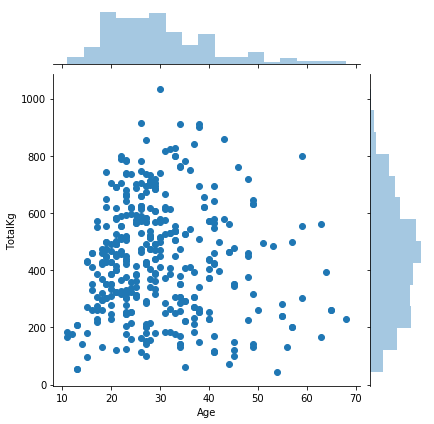

In [27]:
sns.jointplot('Age','TotalKg',data=df)

> There doesn't seem to be a correlation between Age and TotalKg since the weight seems close to a normal distribution regardless of age

* Derive the correlation between `Age` and `TotalKg` using the [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) method.  Does this
new information change your mind about your previous answer?  Why or why not?  Recall that a positive
correlation greater than $0.5$ would indicate a stronger positive correlation
(a perfect correlation being $1.0$) while the closer to zero indicates no correlation.


In [28]:
df[['Age','TotalKg']].corr()

,Age,TotalKg
Age,1.000000,-0.037874
TotalKg,-0.037874,1.000000


> As I have mentioned before, there doesn't seem to be a correlation between Age and TotalKg

### (50%) extend your exploration to a larger dataset 


Recall, that we said there were reasons to obtain our own datasets when one is not provided for
us.  We're going to extend our data to a much larger dataset to see what kinds of patterns emerge.

The partial data that we worked with to do  some data munging in the first part comes with some good news!
The friendly community  at OpenPowerLifting have actually made our job even easier
(you will still need to complete the data munging assignment as indicated in the prior section).

There is a ZIP file with the complete data dump from the most recent competition going
all the way back to the 1960s.  This zip file is <56MB zipped and a few hundred MB unzipped and includes
over 1.3 million records, making this one very interesting data set to explore on a number of fronts.

We're going to explore the full data set, get some basic exploratory analysis underway and prepare ourselves
for the next homework to do some more sophisticated pattern mining.

&#167;  **LOAD THE FULL DATASET**

You are to download the ZIP file from here:

[openpowerlift-latest.zip](https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting-latest.zip)

You are encouraged to use Jupyter shell escaping commands to accmplish this
OR you may open a terminal and use `wget` or `curl` then `unzip`.  You could even write
your own Python code, but this would likely be more effort than necessary for this
assignment. See the supplemental notebook for more information on shell escaping.



In [1]:
!wget https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting-latest.zip

--2019-11-27 13:50:32--  https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting-latest.zip
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sstangl/openpowerlifting-static/gh-pages/openpowerlifting-latest.zip [following]
--2019-11-27 13:50:33--  https://raw.githubusercontent.com/sstangl/openpowerlifting-static/gh-pages/openpowerlifting-latest.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66043531 (63M) [application/zip]
Saving to: ‘openpowerlifting-latest.zip’

openpowerlifting-la 100%[===================>]  62.98M   236KB/s    in 4m 15s  

2019-11-27 13:54:49 (253

In [2]:
!unzip openpowerlifting-latest.zip

Archive:  openpowerlifting-latest.zip
   creating: openpowerlifting-2019-11-20/
  inflating: openpowerlifting-2019-11-20/LICENSE.txt  
  inflating: openpowerlifting-2019-11-20/openpowerlifting-2019-11-20.csv  
  inflating: openpowerlifting-2019-11-20/README.txt  


&#167;  **COMPUTE THE TOTAL PERCENT MEN AND WOMEN COMPETITORS FROM 1964**

Female participation in powerlifting has grown over the years and now women powerlifters are
commonplace in competitive meets.  You are to look into the growth of female participation
given the dataset in the OpenPowerLifting data.

You should begin using the function below that takes the original data from the first part of
this section and returns a Dataframe with the ratio of male to female participants.

```python

def get_gender_ratios(df, year):
    return \
        df.query('Date>"{}-01-01" & Date<"{}-01-01"'.format(year, year+1)).loc[:,['Sex']].squeeze().value_counts() \
            / df.query('Date>"{}-01-01" & Date<"{}-01-01"'.format(year, year+1)).loc[:,['Sex']].shape[0]
```

Thus,

```
> get_gender_ratios(df, 1964)

M    1.0
Name: Sex, dtype: float64
```
Meaning, 100% of the participant data for 1964 were Male.


* You will need to use the function to build a Dataframe with all the years and ratios.  Your final
Dataframe will have two rows 'M' and 'F' and the columns will be the years.  See the supplied
notebook to see an example.  Using that you will be able to transpose the data to complete the remaining
plots and questions.  See the [`.T`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html#pandas.DataFrame.T) method to determine what transposing does.

* Build the Dataframe with all the percentages from 1964 to 2019.


In [29]:
import pandas as pd

In [30]:
df2 = pd.read_csv("openpowerlifting-2019-11-20/openpowerlifting-2019-11-20.csv", low_memory=False)

In [32]:
df2.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,NaN,F-OR,59.8,60,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,NaN,F-OR,58.5,60,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,40-49,F-OR,55.4,56,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,NaN,F-OR,60.0,60,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,40-49,F-OR,104.0,110,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [33]:
def get_gender_ratios(df, year):
    return \
        df.query('Date>"{}-01-01" & Date<"{}-01-01"'.format(year, year+1)).loc[:,['Sex']].squeeze().value_counts() \
            / df.query('Date>"{}-01-01" & Date<"{}-01-01"'.format(year, year+1)).loc[:,['Sex']].shape[0]

In [34]:
df_ratio = pd.DataFrame(columns=['M','F'])

In [35]:
for i in range(1964,2020):
    df_ratio.loc[i,:] = get_gender_ratios(df2,i)

In [36]:
df_ratio.fillna(value=0,inplace=True)
df_ratio.head()

,M,F
1964,1.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0
1968,1.0,0.0


&#167;  **PLOT THE MALE/FEMALE RATIOS AND ANSWER THE QUESTIONS**

* From the previous result, you were able to compute the ratios.  Now plot them.  The simplest way
is to use the [`Dataframe.plot(kind='line')`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) where the `Dataframe` is the transposed data
from the prior section.  Your notebook MUST show the plot for full points.

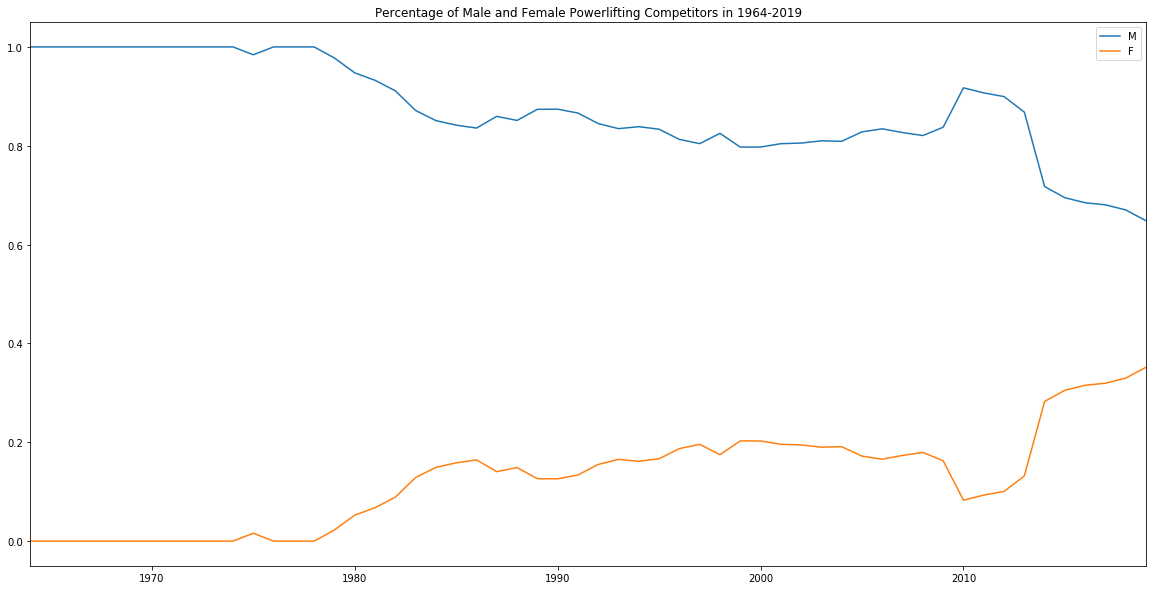

In [37]:
df_ratio.plot(y=["M","F"],
              kind='line',
              figsize=(20,10),
              title="Percentage of Male and Female Powerlifting Competitors in 1964-2019")

* Explain in your own words what _overall_ trend that you see in the data.
> Over the years, it seem like the ratio of Male and Female competitors in powerlifting is getting closer to 50:50.

* When  were the greatest participation increases in women powerlifters?

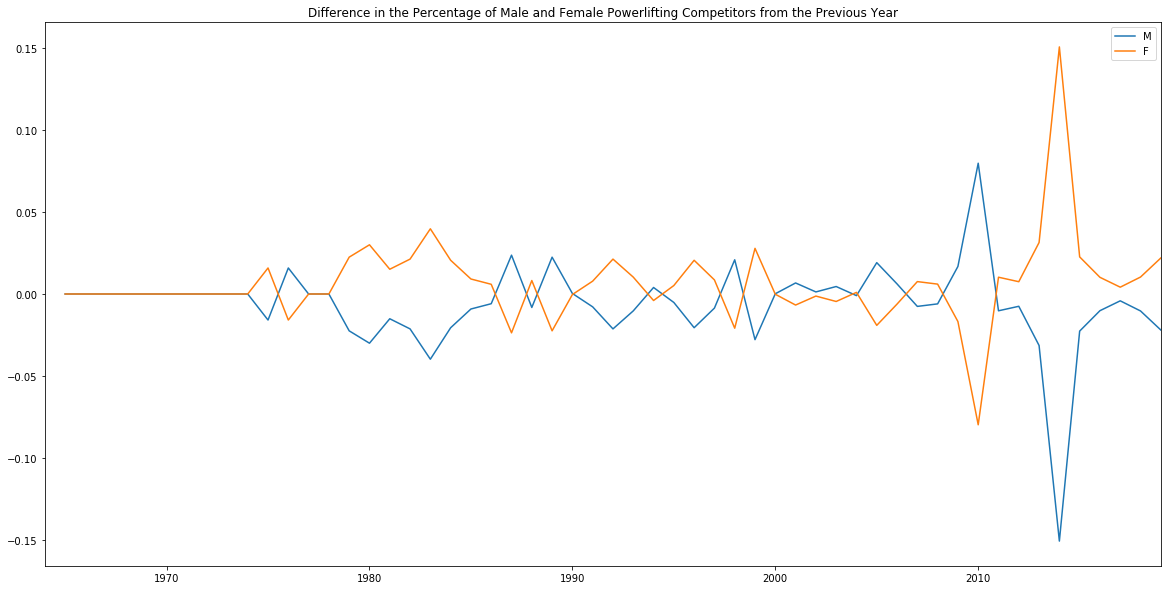

In [38]:
df_differences = df_ratio.diff(axis=0)
df_differences.plot(y=["M","F"],
              kind='line',
              figsize=(20,10),
              title="Difference in the Percentage of Male and Female Powerlifting Competitors from the Previous Year")

In [39]:
df_differences['F'].idxmax()

2014

> The greatest participation increase in Female competitors was in 2014.

* Describe in your own words you see between the years 2009-2012?


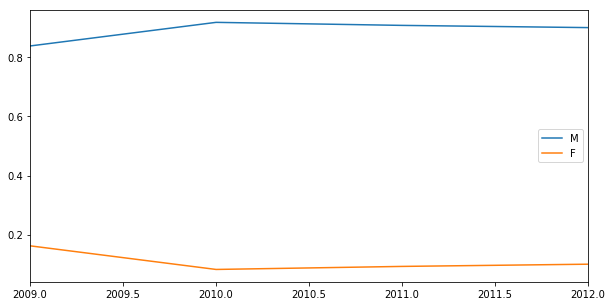

In [40]:
df_ratio.loc[2009:2012,].plot(y=['M','F'],
                             kind='line',
                             figsize=(10,5))

> By looking at the plot of the percentages during 2009-2012, we can see that there was a slight increase in Male competitors, resulting in less Female competitors from 2009-2010. After this increase, the there seems to be no change in the percentages of Male and Female competitors up to 2012.